In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date, datetime

In [2]:
db_location = '/home/arjun/Desktop/Datasets/plan.csv'

In [3]:
if os.path.exists(db_location):
    db = pd.read_csv(db_location)
    print('Read from existing database')
else:
    data = {
    'Date': [], 'AI Theory': [], 'AI Project': [],
    'Programming': [], # Leetcode + Non AI project
    'Non-AI': [], # Non AI, Non programming
    'Workout': [],  'Total': []}

    db = pd.DataFrame(data)
    db.to_csv(db_location, index=False)
    print('Created empty database')

Read from existing database


In [4]:
def add_row(db, new_data):
    new_row = pd.DataFrame(new_data, index=[0])
    updated_db = pd.concat([db, new_row], ignore_index=True)
    return updated_db

In [5]:
work = ['AI Theory', 'AI Project', 'Programming', 'Non-AI', 'Workout', 'Total']

In [6]:
ct = 0
new_data = {}

try:
    for k in work + ['Date']:
        if k == 'Date':
            new_data[k] = f'{date.today().day}-{date.today().month}-{date.today().year}'
            print(new_data)
        elif k == 'Total':
            new_data[k] = ct
        else:
            val = float(input(f'Time spend in {k}:'))
            if k == 'Workout':
                if val: val=1 # Workout is True/ False
            new_data[k] = val
            ct += val
    
    db = add_row(db, new_data)
except:
    print('Did not create new row.')


Did not create new row.


In [7]:
db.to_csv(db_location, index=False)
pd.read_csv(db_location)

,Date,AI Theory,AI Project,Programming,Non-AI,Workout,Total
0,25-5-2024,1.0,2.0,3.0,4.0,1.0,10.0
1,25-5-2024,3.0,1.0,7.0,0.0,1.0,11.0
2,26-5-2024,1.0,2.0,3.0,4.0,5.0,10.0
3,26-5-2024,2.0,6.0,10.0,1.0,0.0,19.0
4,26-5-2024,100.0,2.0,4.0,5.0,3.0,111.0
5,26-5-2024,2.0,3.0,4.0,5.0,6.0,14.0
6,26-5-2024,1.0,3.0,2.0,1.0,3.0,7.0
7,26-5-2024,1.0,2.0,3.0,4.0,5.0,10.0
8,26-5-2024,1.0,2.0,3.0,4.0,5.0,10.0
9,26-5-2024,1.0,2.0,3.0,4.0,5.0,10.0


In [8]:
d = {k:sum(v) for k,v in db.items() if k!='Date'}
df = pd.DataFrame({'Work': d.keys(), 'Time': d.values()})

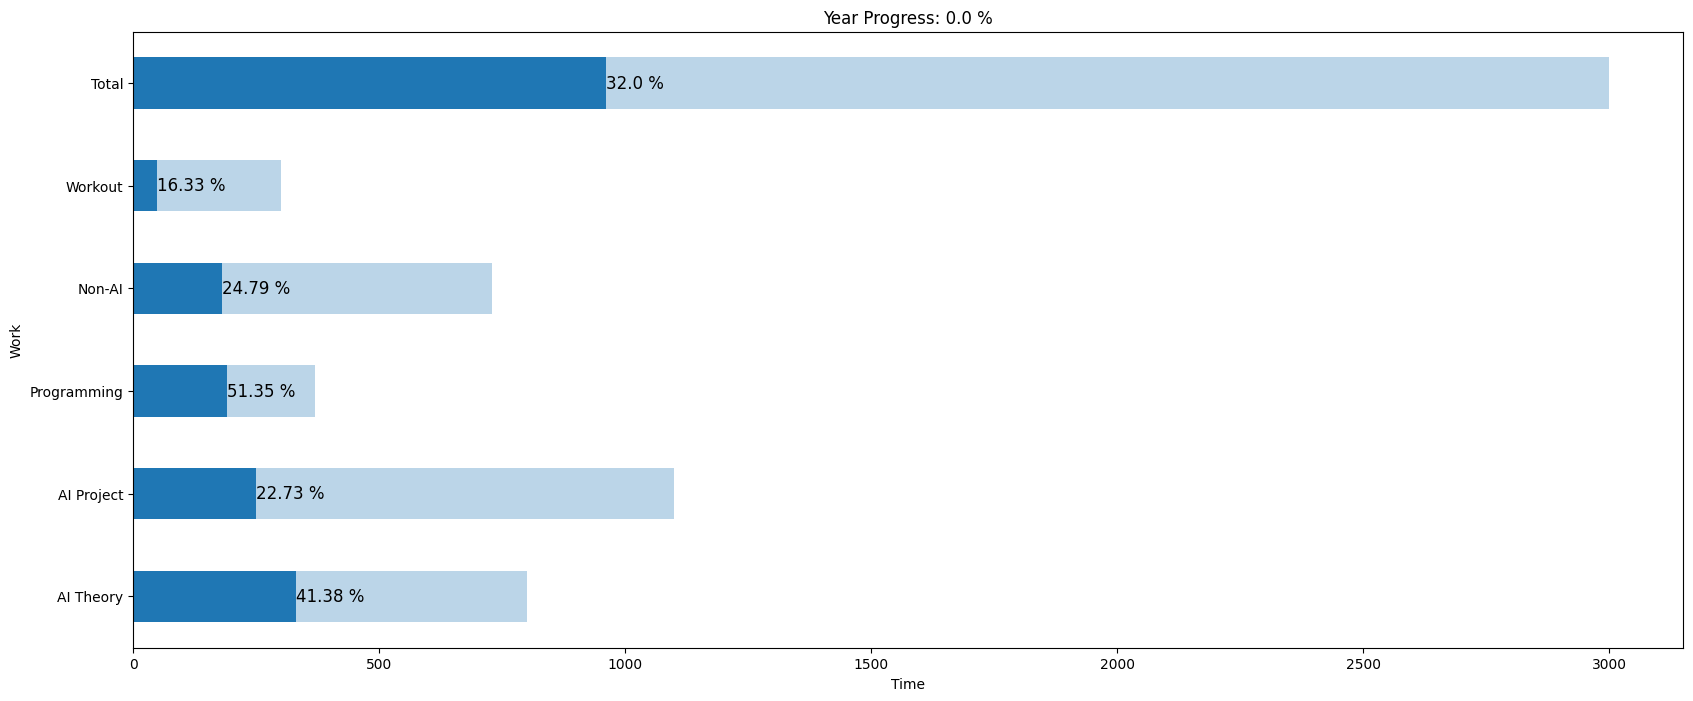

In [9]:
work = ['AI Theory', 'AI Project', 'Programming', 'Non-AI', 'Workout', 'Total']
time_total = [800, 1100, 370, 730, 300, 3000]
df_total = pd.DataFrame({'Work': work, 'Time': time_total})
year_progress = (370 - (datetime(2025, 6, 1) - datetime.today()).days)/370*100 
time_year = [t*year_progress for t in time_total]
df_year = pd.DataFrame({'Work': work, 'Time': time_year})

fig, ax = plt.subplots(figsize=(20, 8))

df.plot(kind='barh', x='Work', y='Time', legend=False, alpha=1, ax=ax)
df_total.plot(kind='barh', x='Work', y='Time', legend=False, alpha=0.3, ax=ax)
df_year.plot(kind='barh', x='Work', y='Time', legend=False, alpha=0.2, ax=ax)

for index, value in enumerate(df['Time']):
    ax.text(value, index, str(round(value*100/df_total['Time'][index],2)) + ' %', color='black', va='center', ha='left', fontsize=12)

plt.title(f'Year Progress: {year_progress*100} %')
plt.ylabel('Work')
plt.xlabel('Time')
plt.show()